In [1]:
import os
import seaborn as sns
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

In [2]:
# Set style preset parameters from Seaborn 
#sns.set()
sns.set_style("darkgrid")
sns.set_context("paper")
sns.set(font='Times New Roman')

In [3]:
# For plot to appear in the notebook
%matplotlib inline 

In [4]:
# Layers used in each test
test_dict={
"A":"MR-BU",
"B":"VHR-BU",
"C":"VHR-3BU",
"D":"VHR-LC" ,
"E":"VHR-LU",
"F":"MR-BU,VHR-LU",
"G":"VHR-BU,VHR-LU",
"H":"VHR-3BU,VHR-LU",
"I":"VHR-LC,VHR-LU",
"J":"MR-BU,VHR-LC,VHR-LU"}

In [20]:
value_column = 'prcterror'
tests_df = pd.DataFrame()
for test in ['A','B','C','D','E','F','G','H','I','J']:
    folder = "/media/tais/My_Book_1/MAUPP/Traitement/Population_modelling_dasymetry/Results/Dakar/Random_Forest/Test_%s"%test
    file_name = "Test_%s_validation_level1"%test
    filepath = os.path.join(folder, file_name + '.dbf')
    gdf = gpd.read_file(filepath)
    tests_df['Test %s (%s)'%(test,test_dict[test])] = abs(gdf[value_column])

In [21]:
tests_df.head()

,Test A (MR-BU),Test B (VHR-BU),Test C (VHR-3BU),Test D (VHR-LC),Test E (VHR-LU),"Test F (MR-BU,VHR-LU)","Test G (VHR-BU,VHR-LU)","Test H (VHR-3BU,VHR-LU)","Test I (VHR-LC,VHR-LU)","Test J (MR-BU,VHR-LC,VHR-LU)"
0,83.415033,52.053060,37.223523,40.035189,54.796907,51.111332,42.531472,39.297351,39.721740,37.989025
1,50.151290,28.024803,49.713917,37.385677,29.947317,19.940957,18.749599,26.275571,23.382871,24.075157
2,12.947257,9.314880,57.067438,17.668439,29.627222,42.874710,33.335187,45.966470,24.401234,28.162084
3,2.578890,26.755643,29.074738,31.612642,34.948250,3.448015,19.267403,26.293892,25.601335,21.092202
4,14.542841,18.172752,5.003015,7.657519,18.248086,15.553693,18.055960,13.521349,12.854861,13.828460


In [27]:
plot_df = pd.melt(tests_df, value_vars=list(tests_df.columns), value_name='abs_'+value_column)

In [28]:
plot_df.head()

,variable,abs_prcterror
0,Test A (MR-BU),83.415033
1,Test A (MR-BU),50.151290
2,Test A (MR-BU),12.947257
3,Test A (MR-BU),2.578890
4,Test A (MR-BU),14.542841


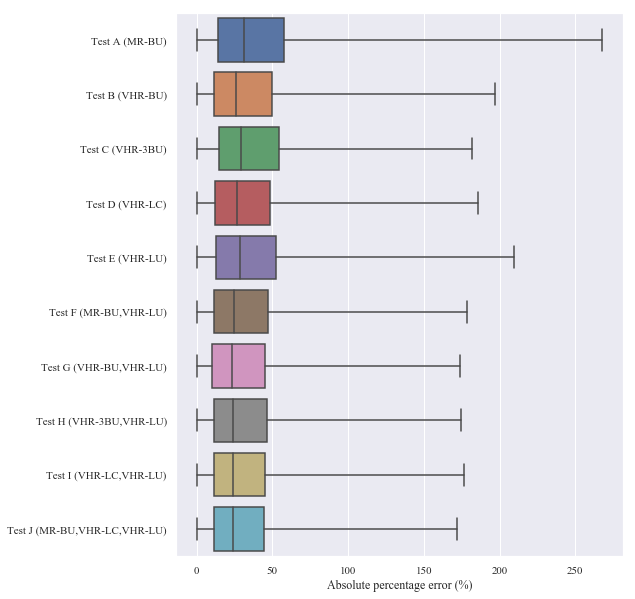

In [36]:
plt.figure(figsize=(8,10))
#sns.boxplot(x="variable", y=value_column, data=plot_df, orient="v")
ax = sns.boxplot(x='abs_'+value_column, y="variable", data=plot_df, orient="h", whis=[0,95], showfliers=False)
ax.set(xlabel='Absolute percentage error (%)', ylabel='')
result_folder = "/media/tais/My_Book_1/MAUPP/Traitement/Population_modelling_dasymetry/Results/Dakar/Random_Forest"
plt.savefig(os.path.join(result_folder, "Dakar_boxplot_%s.svg"%value_column), dpi=300, bbox_inches='tight')

/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


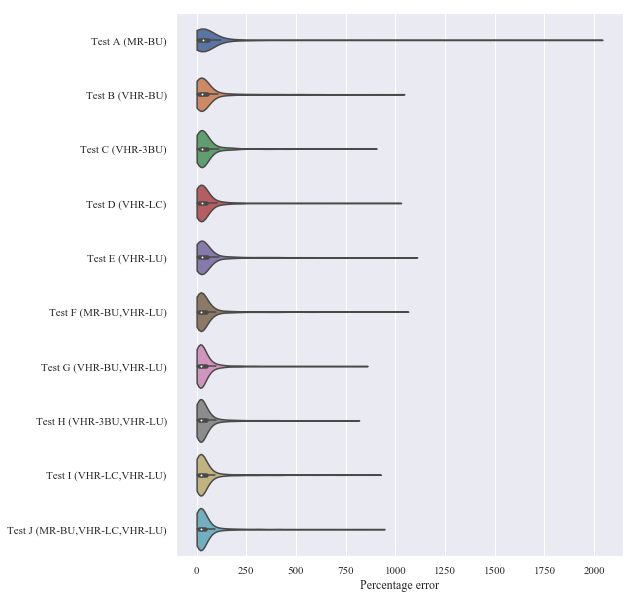

In [31]:
plt.figure(figsize=(8,10))
ax = sns.violinplot(x='abs_'+value_column, y="variable", data=plot_df, orient="h", cut=0)
#sns.violinplot(x=value_column, y="variable", data=plot_df[plot_df[value_column] < 200], orient="h", cut=0)
ax.set(xlabel='Percentage error', ylabel='')
result_folder = "/media/tais/My_Book_1/MAUPP/Traitement/Population_modelling_dasymetry/Results/Dakar/Random_Forest"
plt.savefig(os.path.join(result_folder, "Dakar_violin_%s.svg"%value_column), dpi=300, bbox_inches='tight')

In [5]:
value_column = 'abserror'
tests_df = pd.DataFrame()
for test in ['A','B','C','D','E','F','G','H','I','J']:
    folder = "/media/tais/My_Book_1/MAUPP/Traitement/Population_modelling_dasymetry/Results/Dakar/Random_Forest/Test_%s"%test
    file_name = "Test_%s_validation_level1"%test
    filepath = os.path.join(folder, file_name + '.dbf')
    gdf = gpd.read_file(filepath)
    tests_df['Test %s (%s)'%(test,test_dict[test])] = gdf[value_column]

In [6]:
tests_df.head()

,Test A (MR-BU),Test B (VHR-BU),Test C (VHR-3BU),Test D (VHR-LC),Test E (VHR-LU),"Test F (MR-BU,VHR-LU)","Test G (VHR-BU,VHR-LU)","Test H (VHR-3BU,VHR-LU)","Test I (VHR-LC,VHR-LU)","Test J (MR-BU,VHR-LC,VHR-LU)"
0,1890.184656,1179.522330,843.485028,907.197371,1241.697904,1158.182779,963.763165,890.477977,900.094630,860.831313
1,1735.234639,969.658179,1720.101535,1293.544440,1036.177151,689.957119,648.736127,909.134744,809.047328,833.000444
2,476.717989,342.973874,2101.223085,650.551906,1090.874299,1578.646824,1227.401594,1692.485434,898.453442,1036.927949
3,34.763443,360.666074,391.927465,426.138408,471.102404,46.479244,259.724594,354.441671,345.105991,284.322885
4,381.022431,476.126101,131.079002,200.627010,478.099853,407.506768,473.066145,354.259338,336.797368,362.305643


In [7]:
plot_df = pd.melt(tests_df, value_vars=list(tests_df.columns), value_name=value_column)

In [8]:
plot_df.head()

,variable,abserror
0,Test A (MR-BU),1890.184656
1,Test A (MR-BU),1735.234639
2,Test A (MR-BU),476.717989
3,Test A (MR-BU),34.763443
4,Test A (MR-BU),381.022431


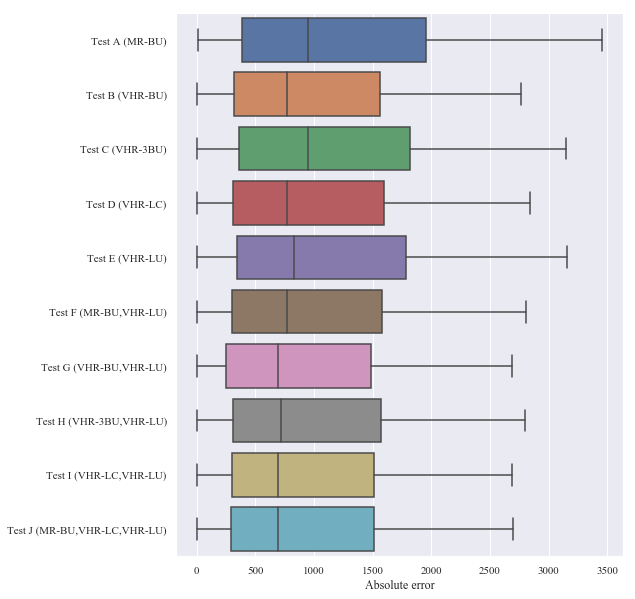

In [10]:
plt.figure(figsize=(8,10))
#sns.boxplot(x="variable", y=value_column, data=plot_df, orient="v")
ax = sns.boxplot(x=value_column, y="variable", data=plot_df, orient="h", whis=0.98, showfliers=False)
ax.set(xlabel='Absolute error', ylabel='')
result_folder = "/media/tais/My_Book_1/MAUPP/Traitement/Population_modelling_dasymetry/Results/Dakar/Random_Forest"
plt.savefig(os.path.join(result_folder, "Dakar_boxplot_%s.svg"%value_column), dpi=300, bbox_inches='tight')